# Texts and Words

In the beginning of the first chapter of _[Natural Language Processing with Python](https://www.nltk.org/book/ch01.html)_, the authors have you download and import a number of prepared texts, which the rest of the chapter then uses. We already have a text, so this notebook starts off by importing the `nltk` library and then making it into the particular kind of *Text* that many `nltk` operations expect. For now, simply run the code in the first cell and let it set up Richard Connell's "The Most Dangerous Game" as well as Joseph Conrad's _Heart of Darkness_ as two text objects you can then explore.

This notebook is designed to allow you to explore the first section of the first chapter, "Computing with Language: Texts and Words" in the NLTK book. That is all that is due for next time. We will work through the rest of the chapter next week.

In [33]:
# Imports
import re
import nltk

# Open and read the file to create a string object
mdg_string = open('../data/mdg.txt', 'r').read()
# Create a list of substrings, aka words
mdg_words = nltk.tokenize.word_tokenize(mdg_string.lower())
# Create the NLTK Text object
mdg = nltk.Text(mdg_words)

# Repeat for "Heart of Darkness"
hod_string = open('../data/hod.txt', 'r').read()
hod_words = nltk.tokenize.word_tokenize(hod_string.lower())
hod = nltk.Text(hod_words)

## Searching Text

The authors introduce `concordance`, `similar`, `common_context`, `dispersion_plot`, and `generate` in this section. I have done concordance for you. Try a few words in concordance: you can do it in the same cell or in a series of cells, then do the same with the other functions. 

When you get to the dispersion plot, please note that, as the authors warn, you have to have other Python libraries installed for it to work. If you can't get it to work, don't worry about it: we will get that working in class. If you can get it to work, try moving back and forth between concordance and dispersion to see how much you can narrow in on the meaning of "The Most Dangerous Game" through finding the contexts / placement of 4-6 "key words." (Oh how the notion of "key" is going to haunt us!)

In [2]:
mdg.concordance("smiled")

Displaying 7 of 7 matches:
 asked . `` Tigers ? '' The general smiled . `` No , '' he said . `` Hunting t
o , '' said Rainsford . The general smiled . `` I had no wish to go to pieces 
 . `` And that was ? '' The general smiled the quiet smile of one who has face
e 'll visit my training school , '' smiled the general . `` It 's in the cella
e . If I find him '' -- the general smiled -- `` he loses . '' `` Suppose he r
s whole being . Why had the general smiled ? Why had he turned back ? Rainsfor
he general sucked in his breath and smiled . `` I congratulate you , '' he sai


As you work through the rest of the section, try to practice two things: using markdown cells like this one to narrate what you are doing and then `# comments` in your code that describe what a line (or cluster of lines) do. For those still or somewhat new to Python, it's a language that "likes" white space and many pythonistas prefer things more vertical than horizontal.

That is, you could do this:
```python
hod = nltk.Text(nltk.tokenize.word_tokenize(open('../data/hod.txt', 'r').read()))
```

but many would consider that approaching "unreadable" and would frown on it. 

For our purposes, codes that is easier to read is better than code that is more compact. We are using code to *explore* human language and not (yet) building any kind of infrastructure where efficiency and compactness are more important than legibility and reproducibility.

If you are new to markdown, GitHub has a short [guide](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax).

In [11]:
# Your first code cell...
mdg.similar("smiled")

zaroff have as but so if face here explained russian nodded blandly


In [17]:
word_list = ["cossack", "knife", "bed"]
agents = ["rainsford", "general", "whitney", "ivan"]

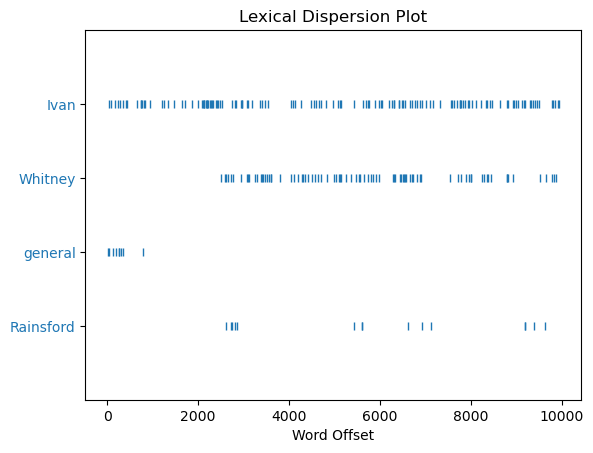

In [31]:
mdg.dispersion_plot(["Rainsford", "general", "Whitney", "Ivan"])

In [20]:
len(mdg)

9942

In [21]:
sorted(set(mdg))

['!',
 "'",
 "''",
 "'Ship-Trap",
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 ',',
 '--',
 '.',
 '...',
 '.the',
 ':',
 ';',
 '?',
 'A',
 'About',
 'Across',
 'Africa',
 'After',
 'Again',
 'Ah',
 'All',
 'Always',
 'Amazon',
 'America',
 'American',
 'Americans',
 'An',
 'And',
 'Another',
 'Anyhow',
 'As',
 'At',
 'Au',
 'Aurelius',
 'Automatically',
 'Bah',
 'Be',
 'Bergere',
 'Better',
 'Bleak',
 'Boredom',
 'Burmese',
 'But',
 'Butterfly',
 'By',
 'Ca',
 'Cannibals',
 'Cape',
 'Captain',
 'Caribbean',
 'Carlo',
 'Caucasus',
 'Chablis',
 'Chambertin',
 'Chinese',
 'City',
 'Civilized',
 'Cliquot',
 'Come',
 'Cossack',
 'Crimea',
 'Czar',
 'Dear',
 'Death',
 'Dense',
 'Desperately',
 'Did',
 'Do',
 'Doubtless',
 'Down',
 'Dusk',
 'Eagerly',
 'East',
 'English',
 'Ennui',
 'Even',
 'Ever',
 'Every',
 'Folies',
 'Follow',
 'Following',
 'For',
 'Fractured',
 'France',
 'French',
 'From',
 'Ganges',
 'Gasping',
 'General',
 'Get',
 'God',
 'God-forsaken',
 'Good',
 'Great',
 'Guns',


In [25]:
len(set(hod)) / len(hod)

0.12995407752410387

In [24]:
mdg.count("Rainsford")

134

In [28]:
def lex_div (text):
    lexdiv =len(set(text)) / len(text)
    return lexdiv


In [29]:
lex_div(mdg)

0.2076041038020519